In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

In [449]:
data_train = pd.read_csv('sample_data/train.csv')

# 1- Vizualização e tratamento de dados

In [450]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [451]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [452]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Tratando Valores Faltantes

In [453]:
imputer = SimpleImputer(strategy='mean')
data_train['Age'] = imputer.fit_transform(data_train[['Age']])
data_train['Fare'] = imputer.fit_transform(data_train[['Fare']])
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)

## Tratando outliers

In [454]:
numeric_features = ['Age', 'Fare']

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data_train[numeric_features])

data_train['outlier'] = outliers

# Remover outliers
data_train = data_train.loc[data_train['outlier'] != -1]  # Filtrar para manter apenas os não outliers

# Remover a coluna de outliers
data_train.drop(columns='outlier', inplace=True)


<ipython-input-454-a42244d58d89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(columns='outlier', inplace=True)


In [455]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


## Removendo redundancias

In [456]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [457]:
data_train.shape

(846, 12)

In [458]:
data_train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

## Balanceamento

In [459]:
from sklearn.model_selection import train_test_split

In [460]:
data_train['Sex'] = data_train['Sex'].map({'male': 0, 'female': 1})
data_train['Embarked'] = data_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [461]:
x = data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data_train['Survived']

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [463]:
data_train.shape

(846, 10)

In [464]:
x_train.shape

(754, 7)

In [465]:
x_test.shape

(254, 7)

#   


---



# 2 Salvando os dados ja tratados

In [466]:
import pickle

In [467]:
with open('sample_data/titanic_data_ready.pkl', mode = 'wb') as f:
  pickle.dump([x_train, x_test, y_train, y_test], f)

#   


---



# 3- Treinando Modelo

## Naive

In [468]:
from sklearn.naive_bayes import GaussianNB

In [469]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

y_naive_pred = naive_model.predict(x_test)

## Random Forest

In [470]:
from sklearn.ensemble import RandomForestClassifier

In [471]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

y_random_forest_pred = random_forest_model.predict(x_test)

## Decision Tree

In [472]:
from sklearn.tree import DecisionTreeClassifier

In [473]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

y_tree_pred = tree_model.predict(x_test)

#   


---



# 4- Matriz de confusão e acuracia de cada modelo

In [474]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Random Forest

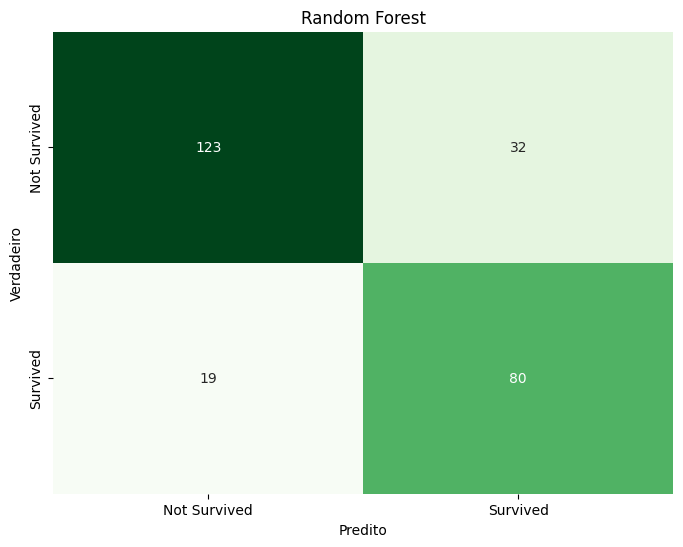

In [475]:
cmR = confusion_matrix(y_test, y_random_forest_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmR, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Random Forest')
plt.show()

In [476]:
print(classification_report(y_test, y_random_forest_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       155
           1       0.71      0.81      0.76        99

    accuracy                           0.80       254
   macro avg       0.79      0.80      0.79       254
weighted avg       0.81      0.80      0.80       254



### Naive

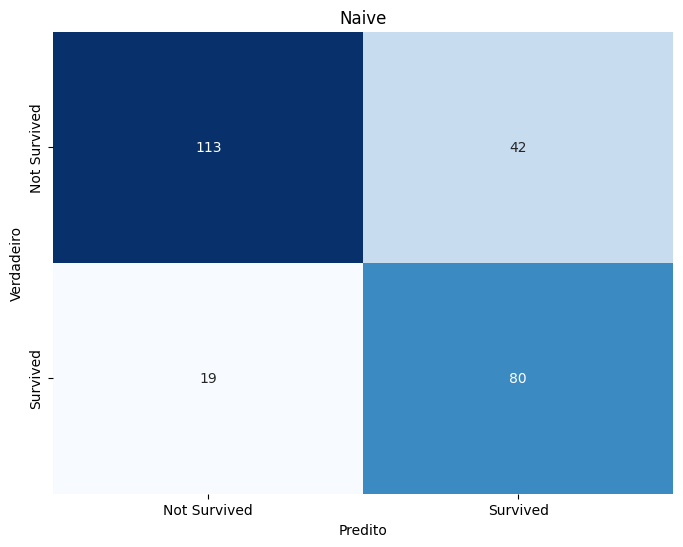

In [477]:
cmN = confusion_matrix(y_test, y_naive_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmN, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Naive')
plt.show()

In [478]:
print(classification_report(y_test, y_naive_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       155
           1       0.66      0.81      0.72        99

    accuracy                           0.76       254
   macro avg       0.76      0.77      0.76       254
weighted avg       0.78      0.76      0.76       254



### Tree

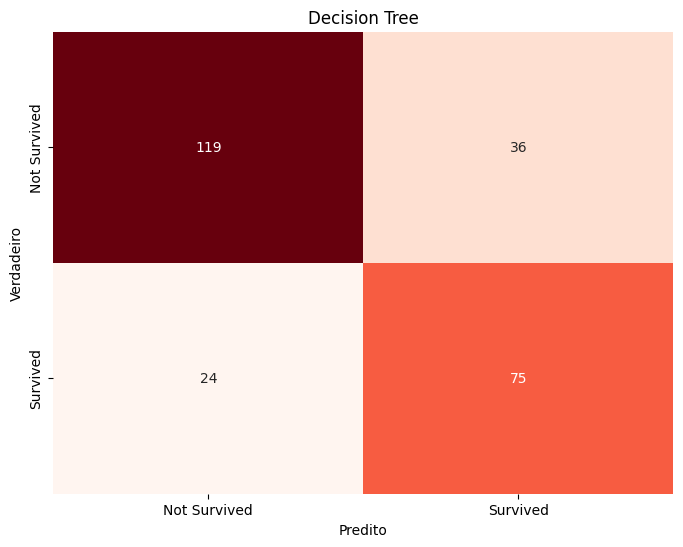

In [479]:
cmT = confusion_matrix(y_test, y_tree_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmT, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Decision Tree')
plt.show()

In [480]:
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       155
           1       0.68      0.76      0.71        99

    accuracy                           0.76       254
   macro avg       0.75      0.76      0.76       254
weighted avg       0.77      0.76      0.77       254



#   


---



# 5- Comparação da acuracia de cada modelo pelo treino

In [481]:
from sklearn.metrics import accuracy_score

### Calculando a acurancia de cada modelo

In [482]:
accuracy_rf = accuracy_score(y_test, y_random_forest_pred)
accuracy_naive = accuracy_score(y_test, y_naive_pred)
accuracy_tree = accuracy_score(y_test, y_tree_pred)

In [483]:
accuracies = [accuracy_rf, accuracy_naive, accuracy_tree]
model_names = ['Random Forest', 'Naive Bayes', 'Árvore de Decisão']

### Criando gráfico de baras

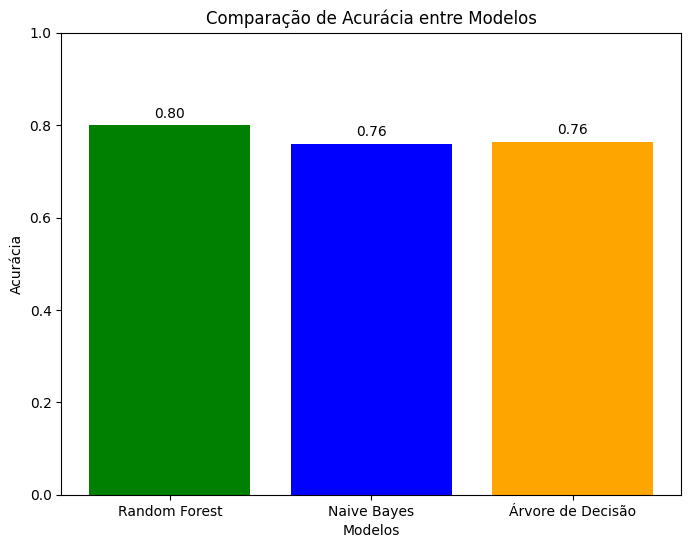

In [484]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange'])

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])  # Definir limites do eixo y para facilitar a leitura
plt.show()

#   


---

